In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
%store -r dataset_final_encoded

In [3]:
dataset = dataset_final_encoded.copy()
dataset

,age,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.conf.idx,marital_divorced,marital_married,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,previously_contacted_no,previously_contacted_yes,y
0,56.000000,5,1,261,1.0,0,1.1,-36.4,0,1,...,0,1,0,1,0,0,1,1,0,0
2,37.000000,5,1,226,1.0,0,1.1,-36.4,0,1,...,0,0,1,1,0,0,1,1,0,0
3,40.000000,5,1,151,1.0,0,1.1,-36.4,0,1,...,0,1,0,1,0,0,1,1,0,0
4,56.000000,5,1,307,1.0,0,1.1,-36.4,0,1,...,0,1,0,0,1,0,1,1,0,0
6,59.000000,5,1,139,1.0,0,1.1,-36.4,0,1,...,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,39.042021,11,5,334,1.0,0,-1.1,-50.8,0,1,...,0,0,1,1,0,1,0,1,0,1
41184,46.000000,11,5,383,1.0,0,-1.1,-50.8,0,1,...,0,1,0,1,0,1,0,1,0,0
41185,56.000000,11,5,189,2.0,0,-1.1,-50.8,0,1,...,0,0,1,1,0,1,0,1,0,0
41186,44.000000,11,5,442,1.0,0,-1.1,-50.8,0,1,...,0,1,0,1,0,1,0,1,0,1


In [4]:
# Independent variables
X = dataset.iloc[:, :-1].values
X

array([[56.        ,  5.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [37.        ,  5.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [40.        ,  5.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [56.        , 11.        ,  5.        , ...,  0.        ,
         1.        ,  0.        ],
       [44.        , 11.        ,  5.        , ...,  0.        ,
         1.        ,  0.        ],
       [39.04202065, 11.        ,  5.        , ...,  0.        ,
         1.        ,  0.        ]])

In [5]:
# Dependent Variable as the output
y = dataset.iloc[:, -1]
y

0        0
2        0
3        0
4        0
6        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 30604, dtype: int64

In [6]:
# For train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [7]:
# Scaling the inputs
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [8]:
# Training the model
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='lbfgs', max_iter=3000, random_state=0)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=3000, random_state=0)

In [9]:
lr_y_pred = lr_classifier.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)
lr_conf_matrix

array([[7806,  239],
       [ 724,  413]], dtype=int64)

<AxesSubplot:>

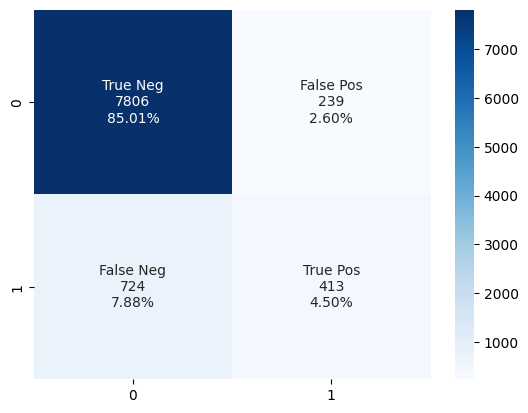

In [11]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in lr_conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in lr_conf_matrix.flatten() / np.sum(lr_conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_conf_matrix, annot=labels, fmt='', cmap='Blues')

In [12]:
target = ['No', 'Yes']

In [13]:
# Measuring precision and recall
from sklearn.metrics import classification_report

print(classification_report(y_test, lr_y_pred, target_names=target))

              precision    recall  f1-score   support

          No       0.92      0.97      0.94      8045
         Yes       0.63      0.36      0.46      1137

    accuracy                           0.90      9182
   macro avg       0.77      0.67      0.70      9182
weighted avg       0.88      0.90      0.88      9182



In [14]:
lr_y_pred= lr_classifier.decision_function(X_test)

In [15]:
from sklearn.metrics import roc_curve, auc

In [16]:
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, lr_y_pred)
lr_auc = auc(lr_fpr, lr_tpr)

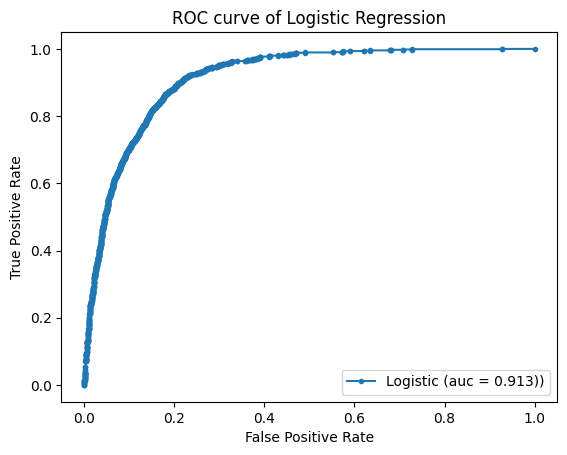

AUC value: 0.9125726932880297


In [17]:
# plt.figure(figsize=(5, 5), dpi=100)
plt.plot(lr_fpr, lr_tpr, marker='.', label="Logistic (auc = %0.3f))" % lr_auc)

plt.title("ROC curve of Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()
print(f"AUC value: {lr_auc}")

## Summary
The accuracy of the model is 90% however the f1 score for "accepting term deposite" is quite low. This might be due to imbalance data. 

## Using SMOTE (Synthetic Minority Oversampling Technique)

In [18]:
# Oversampling methods: SMOTEN, BorderlineSmote, SVMSmote, adasyn
from imblearn.over_sampling import SVMSMOTE as Resample
sm = Resample(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [19]:
y_res.value_counts()

0    18683
1    18683
Name: y, dtype: int64

In [20]:
lr_classifier_oversampled = LogisticRegression(solver='lbfgs', max_iter=3000, random_state = 0)
lr_classifier_oversampled.fit(X_res, y_res)

LogisticRegression(max_iter=3000, random_state=0)

In [21]:
# Prediction
lr_y_pred_oversampled = lr_classifier_oversampled.predict(X_test)

In [22]:
lr_conf_matrix_oversampled = confusion_matrix(y_test, lr_y_pred_oversampled)
lr_conf_matrix_oversampled

array([[6970, 1075],
       [ 256,  881]], dtype=int64)

<AxesSubplot:>

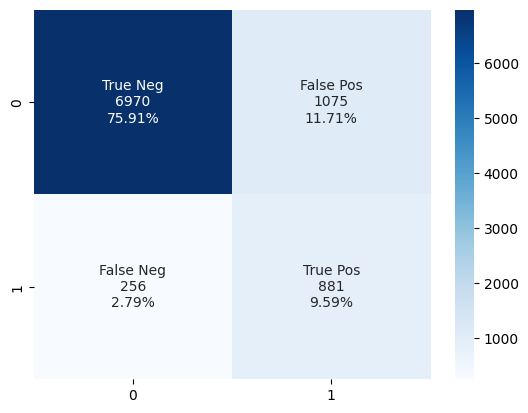

In [23]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in lr_conf_matrix_oversampled.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in lr_conf_matrix_oversampled.flatten() / np.sum(lr_conf_matrix_oversampled)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_conf_matrix_oversampled, annot=labels, fmt='', cmap='Blues')

In [24]:
target = ['No', 'Yes']
print(classification_report(y_test, lr_y_pred_oversampled, target_names=target))

              precision    recall  f1-score   support

          No       0.96      0.87      0.91      8045
         Yes       0.45      0.77      0.57      1137

    accuracy                           0.86      9182
   macro avg       0.71      0.82      0.74      9182
weighted avg       0.90      0.86      0.87      9182



In [25]:
lr_y_pred_oversampled = lr_classifier_oversampled.decision_function(X_test)

In [26]:
lr_fpr_oversampled, lr_tpr_oversampled, lr_threshold_oversampled = roc_curve(y_test, lr_y_pred_oversampled)
lr_auc_oversampled = auc(lr_fpr_oversampled, lr_tpr_oversampled)

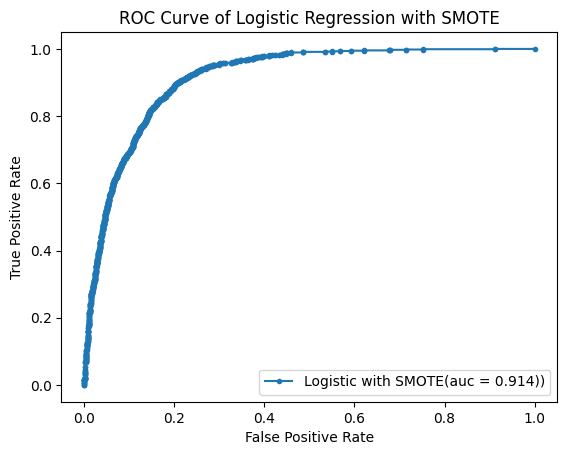

AUC value: 0.9137191687260479


In [27]:
# plt.figure(figsize=(5, 5), dpi=100)
plt.plot(lr_fpr_oversampled, lr_tpr_oversampled, marker='.', label="Logistic with SMOTE(auc = %0.3f))" % lr_auc_oversampled)

plt.title("ROC Curve of Logistic Regression with SMOTE")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()
print(f"AUC value: {lr_auc_oversampled}")

### Comparing AOC value between imbalance and balanced data

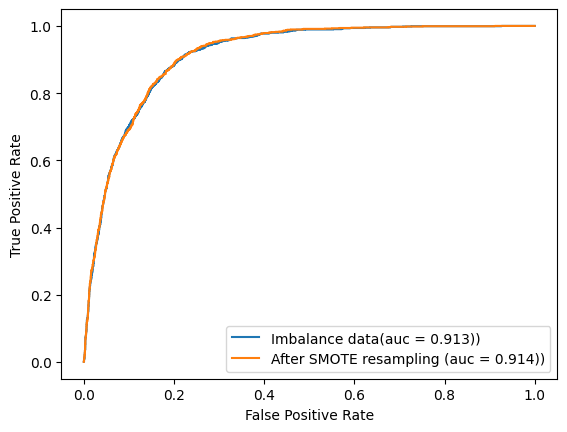

In [28]:
plt.plot(lr_fpr, lr_tpr, label="Imbalance data(auc = %0.3f))" % lr_auc)
plt.plot(lr_fpr_oversampled, lr_tpr_oversampled, label="After SMOTE resampling (auc = %0.3f))" % lr_auc_oversampled)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

# Using Support Vector Machine

#### Without using SMOTE

In [29]:
from sklearn.svm import SVC

In [30]:
svm_classifier = SVC(gamma="auto")
svm_classifier.fit(X_train, y_train)

SVC(gamma='auto')

In [31]:
svm_y_pred = svm_classifier.predict(X_test)

In [32]:
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
svm_conf_matrix

array([[7843,  202],
       [ 782,  355]], dtype=int64)

<AxesSubplot:>

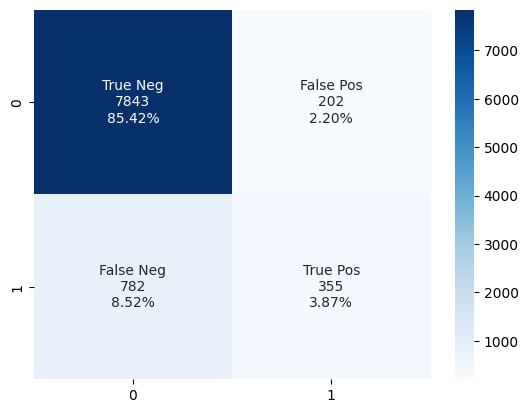

In [33]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in svm_conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in svm_conf_matrix.flatten() / np.sum(svm_conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(svm_conf_matrix, annot=labels, fmt='', cmap='Blues')

In [34]:
print(classification_report(y_test, svm_y_pred, target_names=target))

              precision    recall  f1-score   support

          No       0.91      0.97      0.94      8045
         Yes       0.64      0.31      0.42      1137

    accuracy                           0.89      9182
   macro avg       0.77      0.64      0.68      9182
weighted avg       0.88      0.89      0.88      9182



In [35]:
svm_y_pred = svm_classifier.decision_function(X_test)

In [36]:
svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test, svm_y_pred)
svm_auc= auc(svm_fpr, svm_tpr)

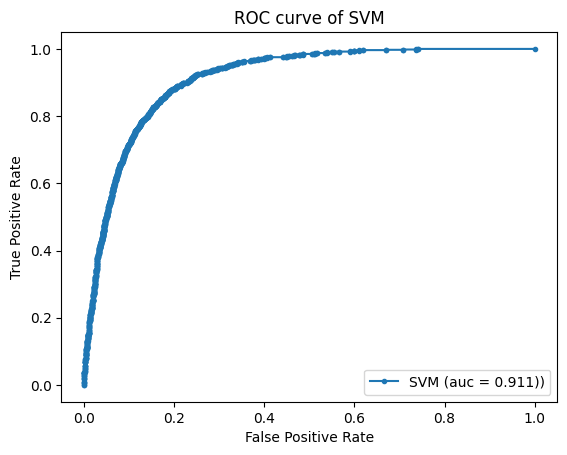

AUC value: 0.9110304668167679


In [37]:
# plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, marker='.', label="SVM (auc = %0.3f))" % svm_auc)

plt.title("ROC curve of SVM")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()
print(f"AUC value: {svm_auc}")

## Summary
The accuracy of the model is 89% however the f1 score for "accepting term deposite" is quite low. This might be due to imbalance data. 

### Using SMOTE

In [38]:
svm_classifier_oversampled = SVC(gamma="auto")
svm_classifier_oversampled.fit(X_res, y_res)

SVC(gamma='auto')

In [39]:
# Prediction
svm_y_pred_oversampled = svm_classifier_oversampled.predict(X_test)
# Confusion Matrix
svm_conf_matrix_oversampled = confusion_matrix(y_test, svm_y_pred_oversampled)
svm_conf_matrix_oversampled

array([[7011, 1034],
       [ 279,  858]], dtype=int64)

<AxesSubplot:>

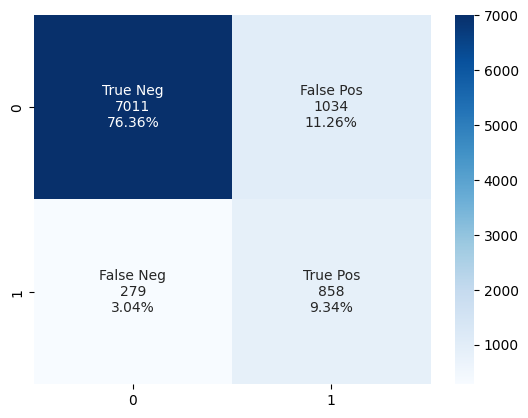

In [40]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in svm_conf_matrix_oversampled.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in svm_conf_matrix_oversampled.flatten() / np.sum(svm_conf_matrix_oversampled)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(svm_conf_matrix_oversampled, annot=labels, fmt='', cmap='Blues')

In [41]:
print(classification_report(y_test, svm_y_pred_oversampled, target_names=target))

              precision    recall  f1-score   support

          No       0.96      0.87      0.91      8045
         Yes       0.45      0.75      0.57      1137

    accuracy                           0.86      9182
   macro avg       0.71      0.81      0.74      9182
weighted avg       0.90      0.86      0.87      9182



In [42]:
svm_y_pred_oversampled = svm_classifier_oversampled.decision_function(X_test)

In [43]:
svm_fpr_oversampled, svm_tpr_oversampled, svm_threshold_oversampled = roc_curve(y_test, svm_y_pred_oversampled)
svm_auc_oversampled = auc(svm_fpr_oversampled, svm_tpr_oversampled)

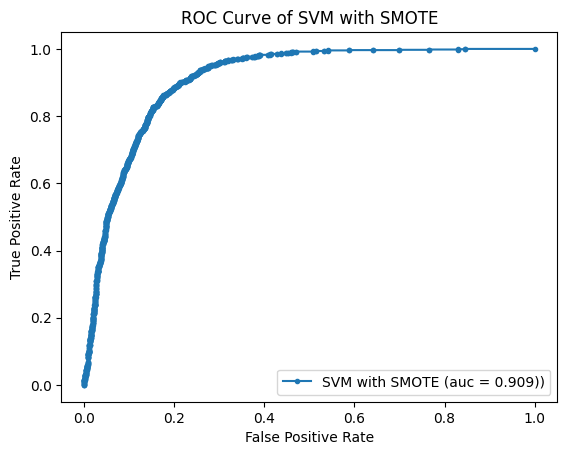

AUC value: 0.9086480893260371


In [44]:
# plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr_oversampled, svm_tpr_oversampled, marker='.', label="SVM with SMOTE (auc = %0.3f))" % svm_auc_oversampled)

plt.title("ROC Curve of SVM with SMOTE")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()
print(f"AUC value: {svm_auc_oversampled}")

### Comparing ROC amongst the models

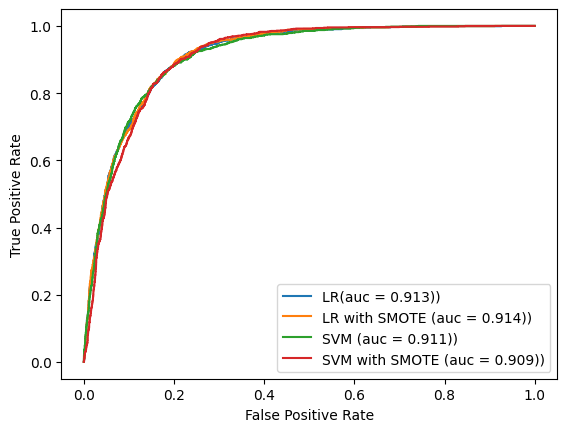

In [45]:
plt.plot(lr_fpr, lr_tpr, label="LR(auc = %0.3f))" % lr_auc)
plt.plot(lr_fpr_oversampled, lr_tpr_oversampled, label="LR with SMOTE (auc = %0.3f))" % lr_auc_oversampled)
plt.plot(svm_fpr, svm_tpr, label="SVM (auc = %0.3f))" % svm_auc)
plt.plot(svm_fpr_oversampled, svm_tpr_oversampled, label="SVM with SMOTE (auc = %0.3f))" % svm_auc_oversampled)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()